In [1]:
from littlefish.core import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_3"
min_generation = 19
max_generation = 29

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000019, 1 / 11 ...
reading generation_0000020, 2 / 11 ...
reading generation_0000021, 3 / 11 ...
reading generation_0000022, 4 / 11 ...
reading generation_0000023, 5 / 11 ...
reading generation_0000024, 6 / 11 ...
reading generation_0000025, 7 / 11 ...
reading generation_0000026, 8 / 11 ...
reading generation_0000027, 9 / 11 ...
reading generation_0000028, 10 / 11 ...
reading generation_0000029, 11 / 11 ...


In [4]:
life_span_df

,generation,fish_name,life_span,is_from_last_geneartion
0,19,b'fish_241105_13_01_10.164723',10000,True
1,19,b'fish_241106_15_38_52.995027',167,True
2,19,b'fish_241106_15_39_01.797702',2808,True
3,19,b'fish_241106_15_39_16.392753',7902,True
4,19,b'fish_241106_15_39_17.741569',1198,True
...,...,...,...,...
10995,29,b'fish_241106_19_00_13.716771',1733,False
10996,29,b'fish_241106_19_00_13.864225',1661,False
10997,29,b'fish_241106_19_00_13.998007',1829,False
10998,29,b'fish_241106_19_00_14.222559',4128,False


In [5]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
999,19,b'fish_241106_15_58_38.405044',41,False
4855,23,b'fish_241106_17_00_16.011558',43,False
6524,25,b'fish_241106_17_28_56.316714',43,False
1781,20,b'fish_241106_16_16_04.995706',46,False
1039,20,b'fish_241106_15_58_24.574872',48,True
...,...,...,...,...
235,19,b'fish_241106_15_58_02.832419',17555,False
3480,22,b'fish_241106_16_44_21.839678',17698,False
3595,22,b'fish_241106_16_44_27.007819',17784,False
7851,26,b'fish_241106_17_42_31.981784',17870,False


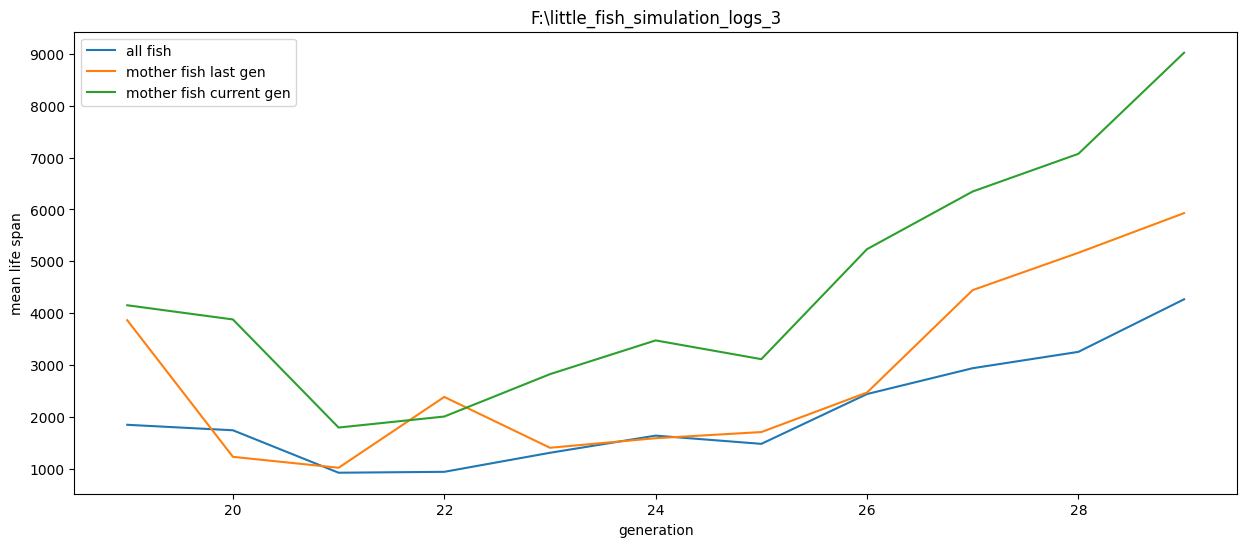

In [6]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()


(0.0, 20000.0)

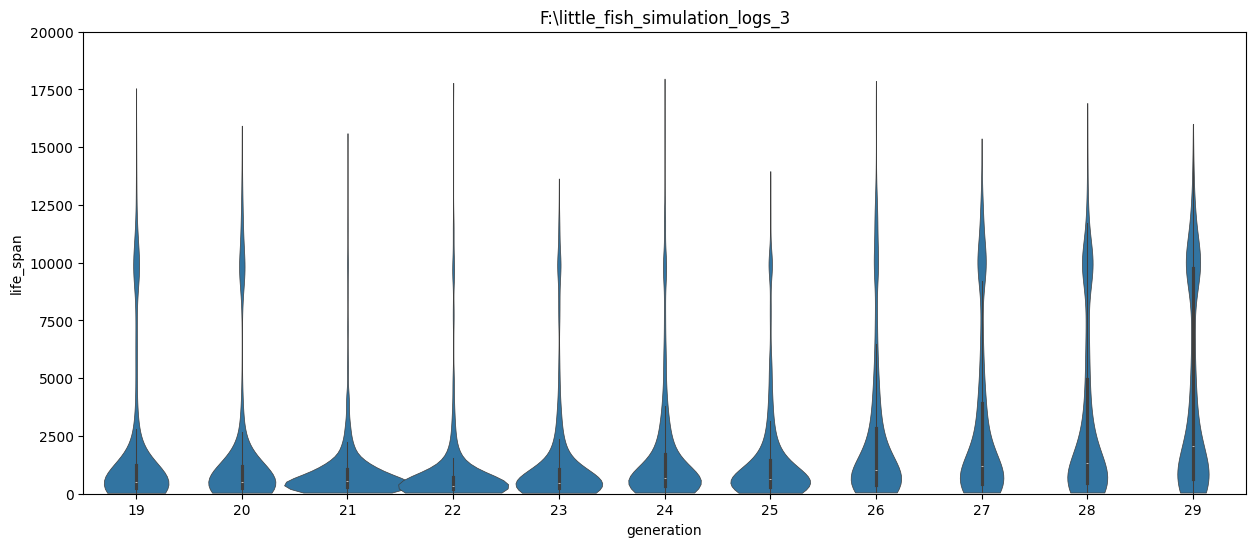

In [7]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5, width=1.2,
)
ax.set_ylim([0, 20000])

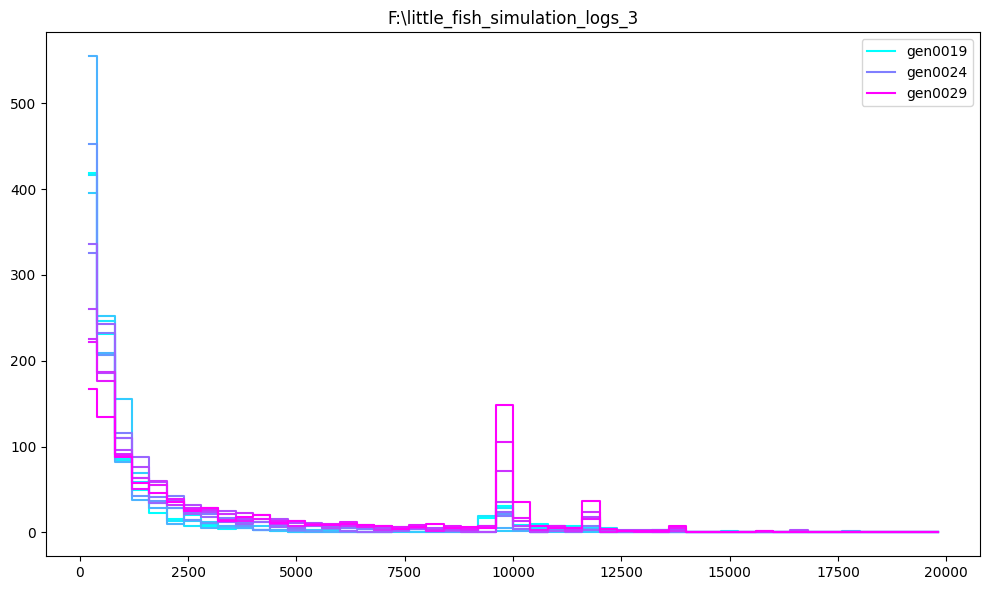

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=20000, bins=50, legend_gap=5,
)
ax.legend()
plt.tight_layout()